<a href="https://colab.research.google.com/github/Meghashreekm/Mining-Sentiment-of-User-from-Twitter-Data-using-Recurrent-Neural-Network-/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'10pI5-aXMoqGuUIsfmYU5htqjmJT8qY56'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sentiment_tweets.csv') 

In [0]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
tweet = pd.read_csv('sentiment_tweets.csv')
tweets=tweet.sample(frac=1)
tweets.head(20)

,Unnamed: 0,message,label
20135,581997,@muffinwomanxo Yes kristen stewart is pretty m...,0
4280,1468276136,Not drunk at all @kirstiekalamity,1
11676,1548719307,@Woth2982 ohhhh no. I was clearing out my dvr ...,1
16352,209205,cross country was so good today 4th; oh yeah ...,0
4337,1468287775,Wishing I could sneak in to watch the Star Tre...,1
3200,1468032862,happy for Coach Stringer (HOF c/o 2009!)...now...,1
20940,659320,"@King_Styles But, man, what a pretty implosion...",0
20537,618841,@glsmeltr and thank you so much for your hospi...,0
18503,423582,@codyjr It is easy to do that.,0
15380,107946,Man with a great sense of humour... Venky Pachad?,0


In [0]:
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)
tweets['label'].value_counts()

1    14314
0     8000
Name: label, dtype: int64

In [0]:

tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 20135 to 484
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  22314 non-null  object
 1   label    22314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 523.0+ KB


In [0]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [0]:

tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 20135 to 484
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  22314 non-null  object
 1   label    22314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 523.0+ KB


In [0]:

trainData['label'].value_counts()

1    14022
0     7849
Name: label, dtype: int64

In [0]:

trainData.head(20)

,message,label
20135,@muffinwomanxo Yes kristen stewart is pretty m...,0
4280,Not drunk at all @kirstiekalamity,1
11676,@Woth2982 ohhhh no. I was clearing out my dvr ...,1
16352,cross country was so good today 4th; oh yeah ...,0
4337,Wishing I could sneak in to watch the Star Tre...,1
3200,happy for Coach Stringer (HOF c/o 2009!)...now...,1
20940,"@King_Styles But, man, what a pretty implosion...",0
20537,@glsmeltr and thank you so much for your hospi...,0
18503,@codyjr It is easy to do that.,0
15380,Man with a great sense of humour... Venky Pachad?,0


In [0]:

testData['label'].value_counts()

1    292
0    151
Name: label, dtype: int64

In [0]:
testData.head(20)

,message,label
5124,Getting ready to leave Cali....I DON&quot;T WA...,1
11957,WANT MOOOOOOOOORE #asot400,1
14336,@aidenchan yeah sure but its my sister's so ta...,0
2400,@msdrama hey missed ya at the meeting sup mama,1
10644,Must have dozed off. Still feel really cruddy ...,1
12175,"watched i am sam, and i criedd",1
4384,@aplusk It amazes me men like you actually exi...,1
12932,nasa US na sis ko... learning how to be indep...,1
5326,thinks she is going to be at this traffic ligh...,1
3952,ill make fresh start.. i promise... xtra sa...,1


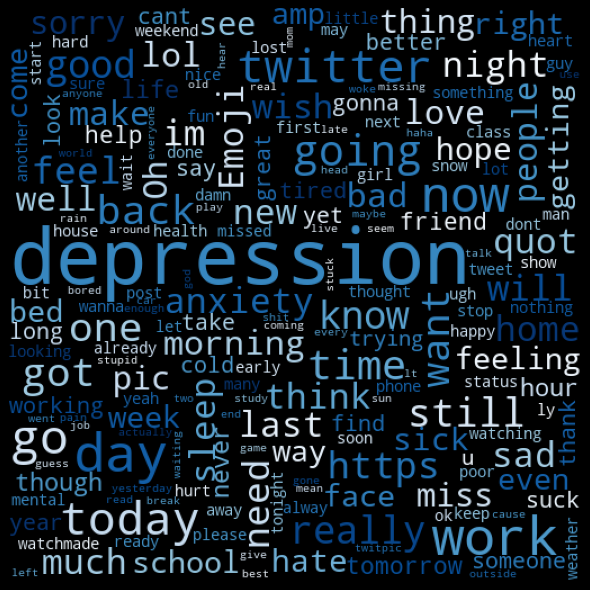

In [0]:

depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

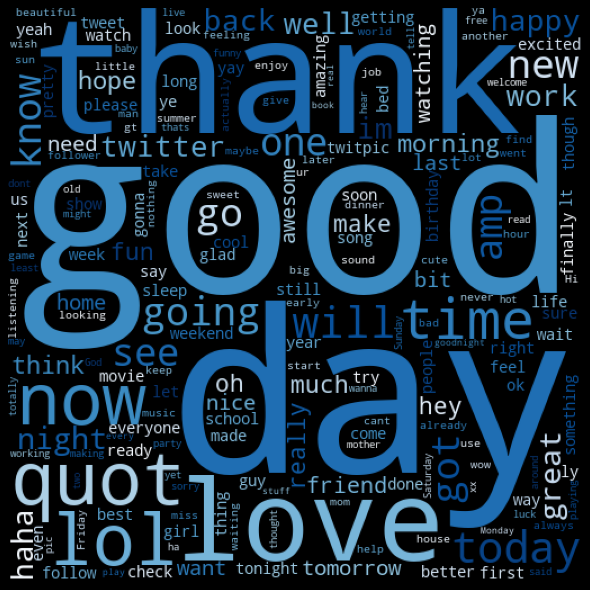

In [0]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [0]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [0]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [0]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [0]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.7898550724637681
Recall:  0.7465753424657534
F-score:  0.7676056338028169
Accuracy:  0.7020316027088036


In [0]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.74
Recall:  0.7474747474747475
F-score:  0.743718592964824
Accuracy:  0.6695464362850972


In [0]:

pm = process_message('my college days were so fun , lived every single data')
sc_tf_idf.classify(pm)

False

In [0]:

pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)

True

In [0]:

pm = process_message('I feel soo anxious and worried all the time, I dont know whats happening with me, I need help')
sc_tf_idf.classify(pm)

True

In [0]:
pm = process_message('my college days were so fun , lived every single day')
sc_tf_idf.classify(pm)

True

In [0]:
pm = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

True

In [0]:
pm=process_message("weather is great today, hope everyone has a great day today")
sc_tf_idf.classify(pm)

False

In [0]:

pm = process_message('Feeling down...')
sc_bow.classify(pm)

True

In [0]:

pm = process_message('cant concentrate for even 10 minutes straight in my class')
sc_bow.classify(pm)

False

In [0]:
pm = process_message('my college days were so fun , lived every single day')
sc_bow.classify(pm)

True

In [0]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

False